## Домашнее задание 4

Выполненную работу (желательно просто **ссылку на репозиторий** с работой на гитхабе) нужно прислать Даше П. (daschapopowa@gmail.com) и Даше Р. (daria.ryzhova@mail.ru) **до 23:59 6 июня**. По уважительной причине дедлайн можно перенести в индивидуальном порядке. Для этого напишите нам, и мы с вами обо всем договоримся.

0. Подумайте над темой эссе -- [инструкция](https://github.com/dashapopova/CompSem2023/blob/main/HW/EssayGuidelines.md)

1. \[2 балла\]

Напишите код для буквального слушающего и для прагматического слушающего. [Промпт](https://github.com/dashapopova/CompSemantics/blob/main/HWs/hw5_prompt.ipynb), в котором отмечены кусочки, которые надо вставить. Если Вы пропускаете этот пункт, в пунктах 2 и 3 вычисления можно проводить вручную.

Написал в отдельный файлик `rsa.py`

In [110]:
from rsa import RSA, display_reference_game
import plotly.express as px
from IPython.display import clear_output
import matplotlib.pyplot as plt
import warnings
import plotly.graph_objects as go
import pandas as pd
warnings.simplefilter(action='ignore', category=FutureWarning)

2. \[2 балла\]

Референциальная игра:

Три объекта (r1, r2, r3)

|        | r1         | r2  | r3 |
| ------------- |-------------| -----|------|
| 'шляпа'    | 1 | 1 | 0 |
| 'очки'     | 0     |   0 | 1|
| 'усы' | 0      |    1 | 0|

Исходная вероятность (P(r), prior)

|        | P(r)|
| ------------- |-------------|
| r1    | 1/3 | 
| r2     | 1/3     |  
| r3 | 1/3      |   

Цена высказывания (C(u), cost)

|        | C(u)|
| ------------- |-------------|
| 'шляпа'   | 0 | 
| 'очки'     | 0     |  
| 'усы' | 0      |   

Если принять, что alpha = 1, то распределение вероятностей для прагматического слушающего такое:

|        | r1         | r2  | r3 |
| ------------- |-------------| -----|------|
| 'шляпа'    | 0.75 | 0.25 | 0 |
| 'очки'     | 0     |   0 | 1|
| 'усы' | 0      |    1 | 0|

- можно ли вывести скалярную импликатуру из таблицы прагматического слушающего? обоснуйте свой ответ

Да, слушающий, услышав "шляпа" скорее подумает на первый объект, видно, что его вероятность выше, но не на "усы", "шляпа" в большинстве случаев подразумевает, что усов никаких нет, говорящий тоже посчитает, что для r2 уместнее сказать про его усы, опять же, потому что у них наибольшая $\mathbb{P}$ в центральной колонке

- что изменится, с точки зрения вычисления импликатуры, если поменять исходные вероятности на P(r1) = 0.1, P(r2) = P(r3) = 0.45? Приведите соответствующую таблицу распределения вероятностей для прагматического слушающего и прокомментируйте её. При расчетах, можно использовать код из пункта 1.

In [111]:
msgs = ['шляпа', 'очки', 'усы']
states = ['r1', 'r2', 'r3']
lex = pd.DataFrame([
    [1, 1, 0],
    [0, 0, 1],
    [0, 1, 0]], index=msgs, columns=states)

rsa = RSA(lexicon=lex, prior=[0.1, 0.45, 0.45], costs=[0.0, 0.0, 0])

display_reference_game(rsa)
print("Pragmatic Listener")
rsa.listener()

,r1,r2,r3,costs
шляпа,1.0,1.0,0.0,0.0
очки,0.0,0.0,1.0,0.0
усы,0.0,1.0,0.0,0.0
prior,0.1,0.45,0.45,
alpha,1.0,,,


Pragmatic Listener


,r1,r2,r3
шляпа,0.330579,0.669421,0.0
очки,0.000000,0.000000,1.0
усы,0.000000,1.000000,0.0


Тогда прагматический слушающий будет считать, что вероятнее при слове "шляпа" подумать на r2. Для всех остальных объектов вероятности останутся теми же, но в случае со шляпой поменяется их порядок - станет большей у r2. Это логично, так как априорная вероятность стала заметно выше, даже если это не единственный атрибут r2, она просто перевесит. Тогда объект со шляпой будет скорее предполагать, что усы у шляпы тоже есть

3. \[4 балла\]

Рассмотрите референциальные игры с тремя объектами и с тремя высказываниями, где можно вычислить две скалярные импликатуры: 

- приведите несколько вариантов таких игр (можно использовать те, которые были в эксперименте в конце занятия 16 мая)

- последовательно проанализируйте, как варьирование параметров цены высказывания, исходной вероятности выбора объекта, оптимальности альфа влияет на вычисление скалярных импликатур в таких играх

При выполнении этого пункта можно использовать код из пункта 1.


C изменениями параметров, как мне кажется, всё достаточно прозрачно, я всего парочку графиков сделаю и на них же посмотрим на разные референциальные игры

Предположим, у нас один из объектов имеет большую стоимость, например нечто нагруженное, по сравнению с остальными. Посмотрим, как меняется импликатура с ростом $C$. И насколько я понимаю, она должна быть с минусом, если я хочу обозначить, что высказывание более сложное, вроде бы во всех статьях формула идёт с минусом на самом деле, да и результаты у меня иначе противоположные

In [173]:
msgs = ['шляпа', 'очки', 'человек, невероятно сильно любящий шляпы']
# man with a long hat, man with glasses, man with
states = ['r1', 'r2', 'r3']
lex = pd.DataFrame([
    [1, 0, 0],
    [0, 1, 0],
    [1, 0, 1]], index=msgs, columns=states)


cost_df = pd.DataFrame()
for cost in np.arange(-10, 10, 1):
    rsa = RSA(lexicon=lex, prior=[1/3, 1/3, 1/3], costs=[0.0, 0.0, -cost])
    # заполняю датафрейм, как пары 'r_'-'значение', чтобы потом нарисовать
    # только в-ти для длинной шляпы, для остальных всё уже однозначно
    melt = pd.melt(rsa.listener()).drop_duplicates("variable", keep="last")
    melt["cost"] = cost
    cost_df = cost_df.append(melt)

Вот как это выглядит для максимальной цены

In [174]:
rsa.listener()

,r1,r2,r3
шляпа,1.000000,0.0,0.000000
очки,0.000000,1.0,0.000000
"человек, невероятно сильно любящий шляпы",0.000062,0.0,0.999938


Так для минимальной

In [177]:
rsa = RSA(lexicon=lex, prior=[1/3, 1/3, 1/3], costs=[0.0, 0.0, 10.0])
rsa.listener()

,r1,r2,r3
шляпа,1.000000,0.0,0.000000
очки,0.000000,1.0,0.000000
"человек, невероятно сильно любящий шляпы",0.499977,0.0,0.500023


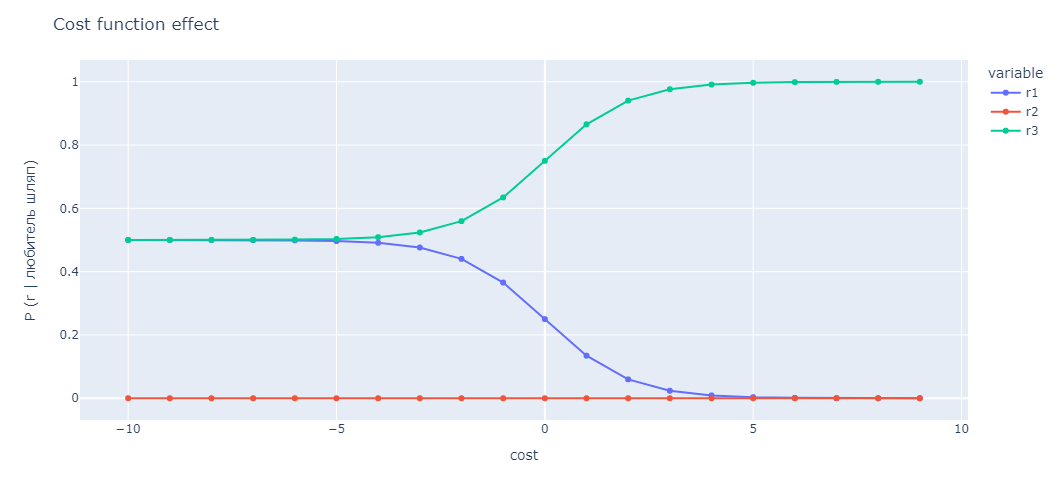

In [178]:
fig = px.line(data_frame=cost_df, x="cost", y="value", color="variable", markers=True)

fig.update_layout(height=500, width=800, title="Cost function effect")
fig.update_xaxes(title="cost")
fig.update_yaxes(title="P (r | любитель шляп)")

fig.show()

Видно, что с увеличением цены высказвания "любитель шляп", говорящий с меньшей вероятностью выберет такое длинное выражение, чтобы назвать r1. Для третьего объекта выбора нет, но с первым всё менее однозначно. Если сделать наоборот, "любителя шляп" более экономным мы по итогу увеличим его вероятность, но это не сделает его лучшим вариантом для говорящего, в первом столбца всё равно останется один, но зато слушающий станет сомневаться, кто - r1 или r3 - больше подходит на роль любителя шляп. В принципе это не влияет на импликатуру, они будут равны разве что в пределе, да и во всех статьях упоминается, что $C$ влияет только на стратегию говорящего, но всё равно занятно

Теперь посмотрим на какую-нибудь игру, где у нас возможны альтернативы для одного референта. Данная изначально тоже подходит, но можно и более неоднозначную сделать. На её примере посмотрим, как влияет $\alpha$. Я просто придумал какие-нибудь значения, где невозможно однозначно выбрать лучшего кандидата из объектов для сообщения

In [183]:
# hat+beard, hat+mustache, hat+glasses+mustache, hat+glasses+beard

msgs = ['шляпа', 'очки', 'усы', 'борода']
states = ['r1', 'r2', 'r3', 'r4']
lex = pd.DataFrame([
    [1, 1, 1, 1],
    [0, 0, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 0, 1]], index=msgs, columns=states)


alpha_df = pd.DataFrame()
for alpha in np.arange(0.001, 50, 2):
    rsa = RSA(lexicon=lex, prior=[0.25, 0.25, 0.25, 0.25], costs=[0.0, 0.0, 0, 0], alpha=alpha)
    # заполняю датафрейм, как пары 'r_'-'значение', чтобы потом нарисовать
    # только первые 4 для шляпы, для остальных всё уже однозначно
    melt = pd.melt(rsa.listener()).drop_duplicates("variable")
    melt["alpha"] = alpha
    alpha_df = alpha_df.append(melt)

Вот как оно выглядит в пределе. Чем больше альфа, тем выше вероятность предпочесть выбрать второй объект, как имеющий шляпу

In [180]:
rsa.listener()

,r1,r2,r3,r4
шляпа,3.527312e-09,1.0,1.252285e-23,3.527312e-09
очки,0.000000e+00,0.0,1.000000e+00,0.000000e+00
усы,0.000000e+00,1.0,1.252285e-23,3.527312e-09
борода,5.000000e-01,0.0,0.000000e+00,5.000000e-01


Для меньших альфа есть некоторая неоднозначность - объекты и в целом имеют очень похожие вероятности, и выбор между r1, r2 сделать сразу проблематично

In [181]:
rsa = RSA(lexicon=lex, prior=[0.25, 0.25, 0.25, 0.25], costs=[0.0, 0.0, 0, 0], alpha=1e-6)
rsa.listener()

,r1,r2,r3,r4
шляпа,0.3,0.300000,0.200000,0.200000
очки,0.0,0.000000,1.000000,0.000000
усы,0.0,0.428572,0.285714,0.285714
борода,0.6,0.000000,0.000000,0.400000


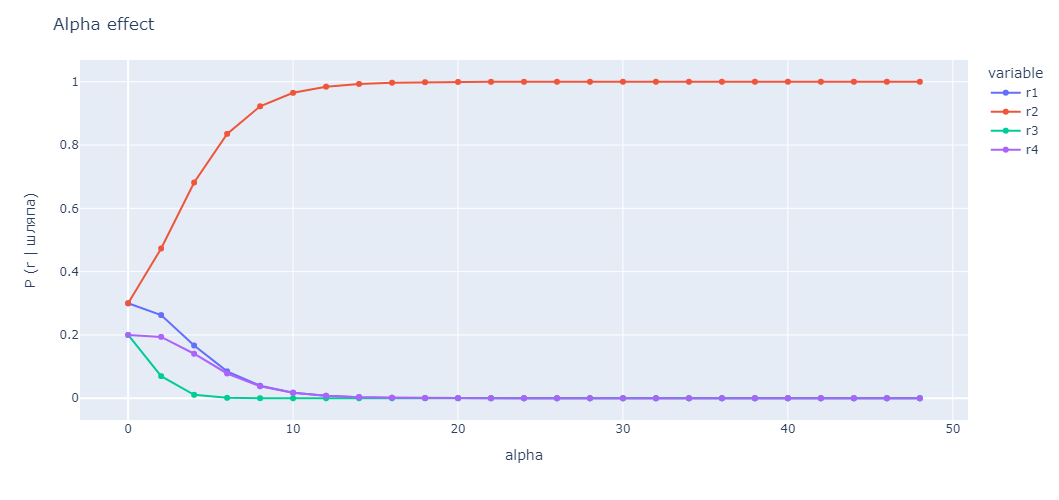

In [185]:
fig = px.line(data_frame=alpha_df, x="alpha", y="value", color="variable", markers=True)

fig.update_layout(height=500, width=800, title="Alpha effect")
fig.update_xaxes(title="alpha")
fig.update_yaxes(title="P (r | шляпа)")

fig.show()

С изменениями $\alpha$ и так всё понятно, она работает (да и есть по большому счёту), как температура в софтмаксе. Чем она больше, тем более график прижат к какой-то оси, тем быстрее у меня вероятности вылетают в $\{0, 1\}$, тем меньше у меня пограничных случаев с половничатой вероятностью. Полезно, если лень думать над пограничными вероятностями и/или выбирать трешхолды

Изменения в априорной вероятности мы уже отчасти наблюдали в предыдущем пункте, если у одного объекта она больше, он в конечном счёте может перевесить и стать наиболее вероятным кандидатом, даже если есть объект, который обладает только этим атрибутом. Это пример с лекции по-моему

In [186]:
# blue square, blue curcle, green square

msgs = ['blue', 'green', 'square', 'circle']
states = ['r1', 'r2', 'r3']
lex = pd.DataFrame([
    [1, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [0, 1, 0]], index=msgs, columns=states)

prob_df = pd.DataFrame()
for prob in np.linspace(0.001, 0.99, 30):
    rsa = RSA(lexicon=lex, prior=[prob, (1-prob)/2, (1-prob)/2], costs=[0.0, 0.0, 0, 0], alpha=alpha)
    # заполняю датафрейм, как пары 'r_'-'значение', чтобы потом нарисовать
    # только первые 3 для шляпы, для остальных всё уже однозначно
    melt = pd.melt(rsa.listener()).drop_duplicates("variable")
    melt["prob"] = prob
    prob_df = prob_df.append(melt)

In [187]:
prob = 0.001
rsa = RSA(lexicon=lex, prior=[prob, (1-prob)/2, (1-prob)/2], costs=[0.0, 0.0, 0.0, 0.0])
rsa.listener()

,r1,r2,r3
blue,0.002,0.998,0.000
green,0.000,0.000,1.000
square,0.002,0.000,0.998
circle,0.000,1.000,0.000


При всех равных перевешивает синий квадрат, когда речь идёт о синем

In [188]:
rsa = RSA(lexicon=lex, prior=[1/3, 1/3, 1/3], costs=[0.0, 0.0, 0.0, 0.0])
rsa.listener()

,r1,r2,r3
blue,0.6,0.4,0.0
green,0.0,0.0,1.0
square,0.6,0.0,0.4
circle,0.0,1.0,0.0


In [189]:
rsa.listener()

,r1,r2,r3
blue,0.6,0.4,0.0
green,0.0,0.0,1.0
square,0.6,0.0,0.4
circle,0.0,1.0,0.0


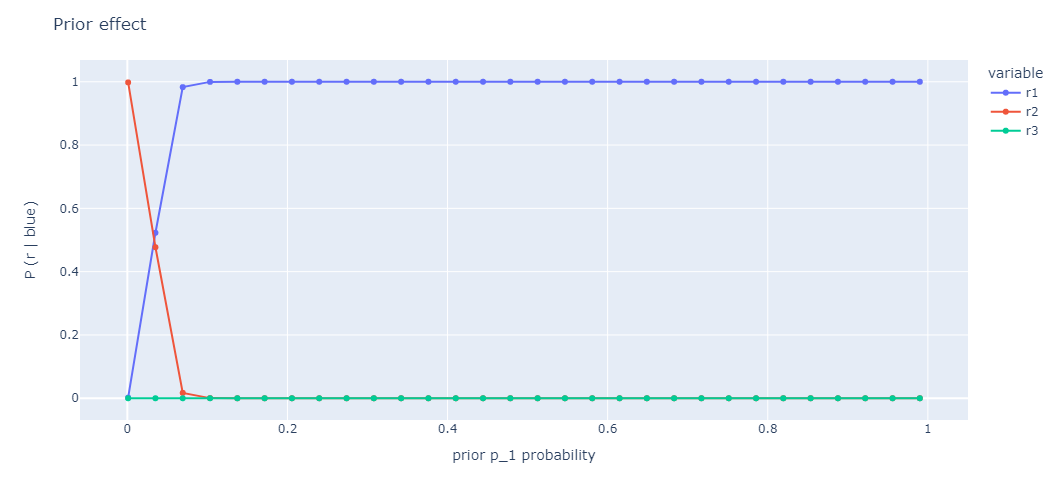

In [191]:
fig = px.line(data_frame=prob_df, x="prob", y="value", color="variable", markers=True)

fig.update_layout(height=500, width=800, title="Prior effect")
fig.update_xaxes(title="prior p_1 probability")
fig.update_yaxes(title="P (r | blue)")

fig.show()

Очевидно, что если вероятность встретить объект в принципе очень-очень мала, говорящий на него не подумает, даже если он самый идеальный кандидат по всем другим признакам - например, только на нём есть шляпа, или это вообще сама по себе шляпа, что мы и видим. При этом вероятность не обязательно нулевая, может быть просто достаточно низкой, но начиная с определённого момента всё выравнивается и уже не меняется

4. \[2 бонусных балла\]

Предложите вариант применения теории рационального речевого акта к лингвистическому феномену, который не обсуждался нами на занятиях. Поясните, почему Вы считаете, что теория рационального речевого акта позволит взглянуть на этот феномен с интересной точки зрения; нужно ли будет модифицировать формулы, как и почему; какую роль в формулах будут играть параметры (цена высказывания, исходная вероятность, оптимальность альфа или какие-то другие параметры, предложенные Вами).

В развернутом виде ответ в этом пункте может стать Вашим эссе.

Возможно, это обсуждалось, но мне кажется, что можно было бы при помощи RSA попробовать моделировать разные семантические переходы. Предположим, в момент времени $t_1$ существует две синонимичные или просто взаимозаменяемые конструкции $A, B$, одна из которых употребляется чаще. Мы можем всегда достать $P(X = k), k \in \{A, B\}$, как просто долю соответствующих конструкций, как в наивном байесовском классификаторе, это наши априорные распределения. Так же можно достать для любого $t_i$. Цену высказывания можно определить как-нибудь обычно, например, длина конструкции или число слов, не особо важно. Альфу я бы вообще никогда не трогал, обычно её либо учат, либо подбирают с какой-то конкретной целью, меня вполне устраивают пограничные вероятности, это чаще всего самые интересные случаи. Формулы скорее всего модифицировать не нужно, разве что можно добавить сглаживание для совсем маленьких вероятностей, но таких скорее всего не будет, если ограничиться счётным числом объектов/конструкций

Дальше можно наблюдать, предположим, какие смыслы эти конструкции непосредственно несут, это видимо надо размечать ручками. Допустим, мы собрали большой датасет, где представлены наши конструкции, у нас есть данные, присутствует там такой-то смысл или нет, мы всё считаем, получаем, что для определённого значения предпочтительны одни конструкции (возможно они даже будут совпадать в разных предложениях), для других - другие и так далее. Затем отступаем на $n$ лет вперёд-назад, проделываем ту же самую процедуру. Если не будет никаких проблем, то возможно получиться выдать картину семантических изменений, с любой заданной точностью, что должно быть прикольно. Так же наверное можно смотреть и на грамматические значения, и на лексические, вообще на какие-угодно, например, так можно попробовать смотреть на грамматикализацию, а конкретнее на бличинг, на метафорический перенос, метонимию, много чего

RSA здесь полезен, потому что есть большой шанс получить прямую зависимость априорных вероятностей от времени, а значит, можно получить гладкие графики, как выше, которые нам покажут, когда именно изменение произошло, устаканилось, как быстро и всё такое, хотя возможно и сейчас это можно с точностью до года сделать, я не уверен